## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:
df = pd.read_csv("owid-covid-data.csv")

df


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97363,ZWE,Africa,Zimbabwe,2021-06-17,40927.0,371.0,204.429,1647.0,7.0,3.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97364,ZWE,Africa,Zimbabwe,2021-06-18,41335.0,408.0,235.286,1656.0,9.0,3.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97365,ZWE,Africa,Zimbabwe,2021-06-19,41628.0,293.0,253.714,1666.0,10.0,4.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97366,ZWE,Africa,Zimbabwe,2021-06-20,41779.0,151.0,260.000,1672.0,6.0,5.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [87]:
location_deaths = df[["location","total_deaths","date"]]

In [88]:
by_loc = location_deaths.groupby("location")
by_loc.sum().sort_values("total_deaths",ascending=False).iloc[0:26]

,total_deaths
location,
World,732960179.0
Europe,216187272.0
North America,199090564.0
South America,170247478.0
European Union,146751660.0
United States,137376731.0
Asia,121314030.0
Brazil,83711355.0
India,52749578.0


In [89]:
df = df[df['location'] == "Spain"]

In [90]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
82394,ESP,Europe,Spain,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
82395,ESP,Europe,Spain,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,-0.39
82396,ESP,Europe,Spain,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
82397,ESP,Europe,Spain,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
82398,ESP,Europe,Spain,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82896,ESP,Europe,Spain,2021-06-17,3753228.0,4197.0,3395.714,80634.0,19.0,24.143,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
82897,ESP,Europe,Spain,2021-06-18,3757442.0,4214.0,3406.000,80652.0,18.0,21.571,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
82898,ESP,Europe,Spain,2021-06-19,3757442.0,0.0,3406.000,80652.0,0.0,21.571,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
82899,ESP,Europe,Spain,2021-06-20,3757442.0,0.0,3406.000,80652.0,0.0,21.571,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN


In [91]:

df.set_index("date", inplace=True)

In [92]:

df= df[["new_cases","new_deaths","population","total_deaths","total_cases"]]


In [93]:
df

,new_cases,new_deaths,population,total_deaths,total_cases
date,,,,,
2020-02-01,1.0,NaN,46754783.0,NaN,1.0
2020-02-02,0.0,NaN,46754783.0,NaN,1.0
2020-02-03,0.0,NaN,46754783.0,NaN,1.0
2020-02-04,0.0,NaN,46754783.0,NaN,1.0
2020-02-05,0.0,NaN,46754783.0,NaN,1.0
...,...,...,...,...,...
2021-06-17,4197.0,19.0,46754783.0,80634.0,3753228.0
2021-06-18,4214.0,18.0,46754783.0,80652.0,3757442.0
2021-06-19,0.0,0.0,46754783.0,80652.0,3757442.0


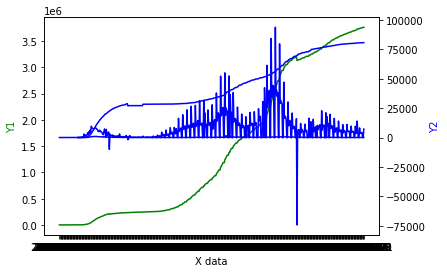

In [102]:
columnas = df[["new_cases","new_deaths","total_deaths"]]
x = df.index
y1 = df["total_cases"]
y2 = columnas

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x,y1,'g-')
ax2.plot(x,y2,'b-')
 
ax1.set_xlabel("X data")
ax1.set_ylabel("Y1",color='g')
 
ax2.set_ylabel("Y2",color='b')
 
plt.show()

<AxesSubplot:xlabel='date'>

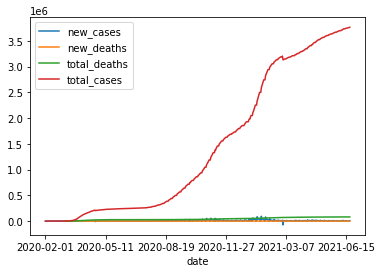

In [98]:
columnas.plot()

In [104]:
df.drop("population",axis=1, inplace=True)

C:\Users\34606\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [105]:
df

,new_cases,new_deaths,total_deaths,total_cases
date,,,,
2020-02-01,1.0,NaN,NaN,1.0
2020-02-02,0.0,NaN,NaN,1.0
2020-02-03,0.0,NaN,NaN,1.0
2020-02-04,0.0,NaN,NaN,1.0
2020-02-05,0.0,NaN,NaN,1.0
...,...,...,...,...
2021-06-17,4197.0,19.0,80634.0,3753228.0
2021-06-18,4214.0,18.0,80652.0,3757442.0
2021-06-19,0.0,0.0,80652.0,3757442.0


In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

### columna new_cases

In [123]:
df = df[~np.isnan(df).any(axis=1)]

In [124]:
y = np.array(df["new_cases"])
X = np.array(df.drop("new_cases",axis=1))
y.shape
X.shape

(476, 3)

In [125]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=7)
dtr = DecisionTreeRegressor()
dtr.fit(train_X, train_y)

DecisionTreeRegressor()